# Moon Classifier

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from random import randint

##### ABRIMOS NUESTRO DATASET

In [4]:
data = pd.read_csv('MoonImgsXData.csv')
X = data.iloc[:,1:1024]
X = np.array(X)
X = X.reshape((422,1024))
print(X)
print(X.shape)

[[0.99215686 0.99215686 0.99215686 ... 0.99215686 0.99215686 0.99215686]
 [0.99215686 0.99215686 0.99215686 ... 0.99215686 0.99215686 0.99215686]
 [1.         1.         1.         ... 1.         1.         1.        ]
 ...
 [1.         1.         1.         ... 0.99607843 0.99607843 0.99607843]
 [1.         1.         1.         ... 1.         1.         1.        ]
 [0.81176471 0.78039216 0.78431373 ... 0.85882353 0.86666667 0.86666667]]
(422, 1024)


In [5]:
data = pd.read_csv('MoonImgsYData.csv')
y = (data.iloc[:,1]).values.flatten()
y = np.array(y)
print(y)
print(y.shape)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
(422,)


##### Generamos Vector Theta

In [6]:
#Inicializacion aleatoria del vector Theta
print("Generando Theta aleatorio")
theta = (np.random.rand(1024) * (2.0/1024)).reshape((1024,1))
print(theta)
print(theta.shape)

Generando Theta aleatorio
[[0.00152956]
 [0.00067987]
 [0.00044256]
 ...
 [0.00061185]
 [0.00146351]
 [0.00073451]]
(1024, 1)


##### Definimos Funciones a Utilizar

In [7]:
#Funcion Sigmoide
def sigmoide(Z):
    return 1/(1+np.exp(-Z))

#CostFunction and Gradient
def costFunc(X,Y,Theta):
    J =  -np.sum( Y*np.log(sigmoide(X@Theta)) + (1-Y)*np.log(1-sigmoide(X@Theta)))/(Y.shape[0])
    J_grad = (X.T@(sigmoide(X@Theta) - Y))/(Y.shape[0])
    return J, J_grad

#Actualiced Theta
def act_Theta(Theta,J_grad,alpha):
    return  Theta - alpha*J_grad

#CostFunction and Gradient Descent
def gradientDescent(X,Y,Theta_gd,alpha=0.01,iteraciones=400):
    histJ = []
    histJ_grad= []
    J , J_grad = costFunc(X,Y.reshape(-1,1),Theta_gd)
    histJ.append(J)
    histJ_grad.append(J_grad)
    for i in range(1,iteraciones+1):
        Theta_gd = act_Theta(Theta_gd,J_grad,alpha=alpha)
        J , J_grad = costFunc(X,Y.reshape(-1,1),Theta_gd)
        histJ.append(J)
        histJ_grad.append(J_grad)
        if i%100 ==0:
            print("Función de costo en la iteración ", i, ": ",round(J,6))
    return Theta_gd , histJ, histJ_grad

#Conteo de aciertos
def aciertos(X,Theta_opt,Y): 
    Salida = np.where(sigmoide(X@Theta_opt)>= 0.5, 1, 0)
    return Salida, np.sum(Y.reshape(-1,1) == Salida)/(Y.shape[0])

##### Pueba Simple de la Funcion de Costo

In [8]:
costFunc(X,y.reshape(-1,1),theta)

(0.6512371063860782,
 array([[-0.01029957],
        [-0.0151095 ],
        [-0.01212851],
        ...,
        [-0.01324707],
        [-0.01532381],
        [-0.01456957]]))

##### Entrenamos el Modelo

In [9]:
#Aplicando el GradientDescent
Theta_opt , J_hist , histJ_grad = gradientDescent(X,y,theta, alpha=0.01)

Función de costo en la iteración  100 :  0.472799
Función de costo en la iteración  200 :  0.452288
Función de costo en la iteración  300 :  0.439915
Función de costo en la iteración  400 :  0.430194


##### Graficamos la evolucion de los costos

Siendo los valores optimos de Theta:


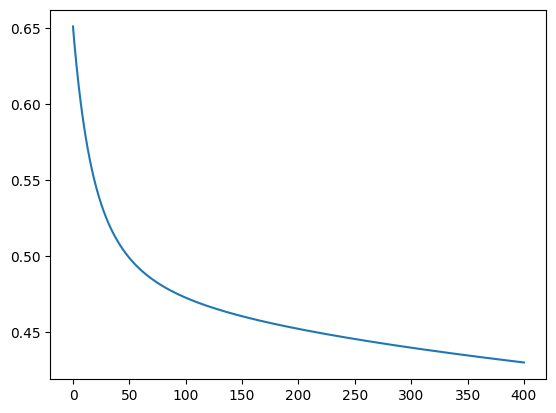

In [10]:
#Mostrando los Theta Optimos y Grafico del historial de Costo
print("Siendo los valores optimos de Theta:")
# print(Theta_opt)
plt.plot(J_hist)

##### Vemos los aciertos en el propio DataSer

In [16]:
#Conteo de Aciertos usando el mismo DataSet
print("Por ultimo la probabilidad clasificando el mismo DataSet con los Theta optimos es:")
Y_hat , count = aciertos(X,Theta_opt,y)
print(count)

Por ultimo la probabilidad clasificando el mismo DataSet con los Theta optimos es:
0.8317535545023697


##### Prueba Unitaria del Modelo

En esta seccion podemos probar y verificar como se comporta el modelo ante los registros del DataSet

Data elegida:  378
Datos:  [0.94117647 0.9372549  0.93333333 ... 0.98039216 0.91764706 0.95686275]
Resultado:  No luna
Prediccion: Luna


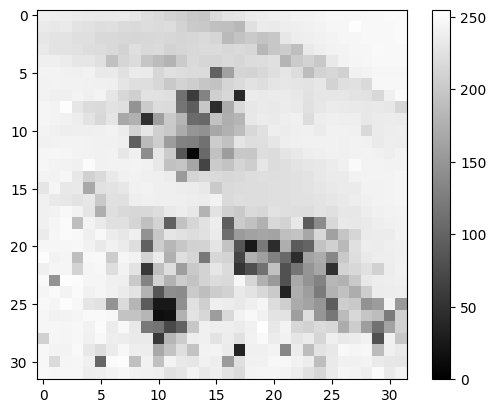

In [36]:
#Prueba con un dato especifico
indTest = randint(0,y.shape[0])
print("Data elegida: ",indTest)

xTest = X[indTest]
print("Datos: ",xTest)
yTest = y[indTest]
if(yTest):
    print("Resultado: ","Luna")
else:   
    print("Resultado: ","No luna")

pred = sigmoide(xTest@Theta_opt)
if(pred >= 0.5):
    print("Prediccion:","Luna")
else:
    print("Prediccion:","NO luna")
    
x2img = (xTest*255).reshape(32,32)
plt.imshow( x2img, cmap="gray", vmin=0, vmax=255)
plt.colorbar()
plt.show()
